
# Set up the notebook

In [1]:

%pprint

Pretty printing has been turned OFF


In [2]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

from choropleth_utils import ChoroplethUtilities
from storage import Storage

s = Storage()
us_stats_df = s.load_object('us_stats_df')
cu = ChoroplethUtilities(one_country_df=us_stats_df, s=s)

In [3]:

# Find a nice-sized dataset that you can represent pixel-by-datapoint
import math

# the sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
tuples_list = []
for column_name in us_stats_df.columns:
    try:
        side = math.ceil(math.sqrt(us_stats_df[column_name].sum()))
        side_tuple = (side, column_name)
        tuples_list.append(side_tuple)
    except TypeError as e:
        continue
for (side, column_name) in sorted(tuples_list, key=lambda x: x[0], reverse=True):
    print(f'{column_name}: {side:,}x{side:,}')

gdp_proportion_of_military_expenditures_2021: 866,026x866,026
State_Population: 46,653x46,653
Total_Inhabitants_2010: 17,586x17,586
gdp_millions_usd_2021: 4,802x4,802
gdp_millions_usd_2020: 4,631x4,631
GDP_2018: 4,541x4,541
Guns_Registered: 2,278x2,278
gdp_per_capita_2021: 1,871x1,871
gdp_per_capita_2020: 1,809x1,809
annual_change_usd: 1,273x1,273
total_prison_population: 1,107x1,107
Gun_Suicide_Deaths: 374x374
Suicide_Deaths_2017: 218x218
Suicide_Deaths_2016: 212x212
Suicide_Deaths_2015: 211x211
Suicide_Deaths_2014: 207x207
text_x: 184x184
centroid_x: 182x182
Suicide_Deaths_2005: 181x181
Total_Murder_Deaths_2010: 119x119
text_y: 115x115
centroid_y: 114x114
Inhabitants_Per_Square_Mile_2010: 100x100
Total_Gun_Murder_Deaths_2010: 97x97
Suicide_Rate_2017: 92x92
Suicide_Rate_2016: 89x89
Suicide_Rate_2015: 89x89
Suicide_Rate_2014: 87x87
Suicide_Rate_2005: 79x79
cost_of_living_index: 73x73
grocery_index: 73x73
co2_emissions_mmt: 72x72
Internal_Auditing: 62x62
State_Budget_Processes: 61x61
Pr

In [4]:

def get_fontsize(rect_width, label_length):
    # Based on Wyoming:
    # f(4.701557080830737, 7) = 10.0
    
    return 14.888684492506771 * (rect_width / label_length)
rect_width = 4.701557080830737
label_length = 7
get_fontsize(rect_width, label_length)

10.0

In [5]:

import matplotlib.pyplot as plt
from squarify import normalize_sizes, squarify

def plot_treemap_layout(values_list, colors_list, labels_list, ax, verbose=False):
    """Plotting with Matplotlib.

    Parameters
    ----------
    values_list
        sizes input for squarify
    colors_list
        list of rgba tuples (see Matplotlib documentation for details)
    labels_list
        list of label texts
    ax
        Matplotlib Axes instance
    """
    
    # Get the list of rectangles
    normed = normalize_sizes(values_list, 100, 100)
    rects_list = squarify(normed, 0, 0, 100, 100)
    
    # Draw the rectangles as horizontal bars with the bottom at y
    lefts_list = [rect['x'] for rect in rects_list]
    bottoms_list = [rect['y'] for rect in rects_list]
    widths_list = [rect['dx'] for rect in rects_list]
    heights_list = [rect['dy'] for rect in rects_list]
    ax.bar(x=lefts_list, height=heights_list, width=widths_list, bottom=bottoms_list, color=colors_list, label=labels_list, align='edge')
    
    # Draw the labels in the centers of the rectangles
    if verbose: text_objs_list = []
    for label_str, rect, color_tuple in zip(labels_list, rects_list, colors_list):
        
        # Get text color
        alpha_channel = color_tuple[-1]
        backround_rgb = tuple([255*color for color in color_tuple[:-1]])
        fill_color_rgb = cu.get_fill_color_rgb(backround_rgb=backround_rgb)
        text_rgba = tuple([rgb/255 for rgb in fill_color_rgb]) + tuple([alpha_channel])
        
        # Get font size and text position
        x = rect['x'] + (rect['dx'] / 2)
        y = rect['y'] + (rect['dy'] / 2)
        text_obj = ax.text(x=x, y=y, s=label_str, verticalalignment='center', horizontalalignment='center', color=text_rgba,
                           fontsize=get_fontsize(rect['dx'], len(label_str)))
        if verbose: text_objs_list.append(text_obj)
    if verbose:
        for rect_width, label_str, text_obj, color_tuple in zip(widths_list, labels_list, text_objs_list, colors_list):
            alpha_channel = color_tuple[-1]
            backround_rgb = tuple([255*color for color in color_tuple[:-1]])
            print(rect_width, label_str, len(label_str), text_obj.get_fontsize(),
                  cu.color_distance_from('black', backround_rgb), cu.color_distance_from('white', backround_rgb))
    
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

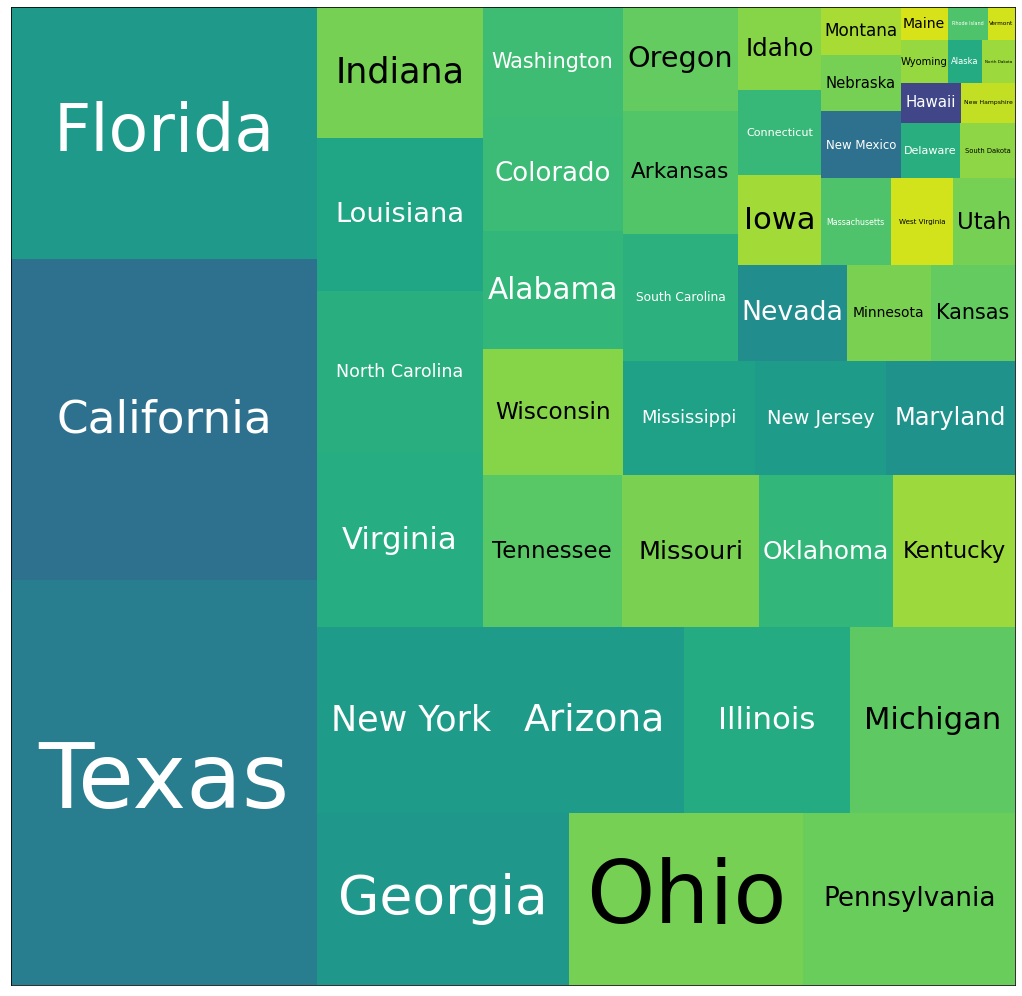

In [6]:

import matplotlib.cm
import matplotlib.pyplot as plt

column_name = 'total_prison_population'
columns_list = [column_name, 'White_Percent']

# values must be sorted descending (and positive, obviously)
df = us_stats_df[columns_list].dropna().sort_values(column_name, ascending=False)

fig, ax = plt.subplots(figsize=(18, 18))
cmap = matplotlib.cm.get_cmap()
colors_list = [cmap(i) for i in df.White_Percent]
AxesSubplot_obj = plot_treemap_layout(values_list=df[column_name].tolist(), colors_list=colors_list,
                                      labels_list=df.index, ax=ax, verbose=False)